# A minimal ALF run

In this bare-bones example we use the [pyALF](https://git.physik.uni-wuerzburg.de/ALF/pyALF) interface to run the canonical Hubbard model on a default configuration: a $6\times6$ square grid, with interaction strength $U=4$ and inverse temperature $\beta = 5$.  

Bellow we go through the steps for performing the simulation and outputting observables.

---

**1.** Import `Simulation` class from the `py_alf` python module, which provides the interface with ALF:

In [1]:
import os
import numpy as np
from py_alf import ALF_source, Simulation  # Interface with ALF

**2.** Create an instance of `Simulation`, setting parameters as desired:

In [2]:
alf_src = ALF_source(
    branch='211-add-nematic-dirac-hamiltonian'
)

Checking out branch 211-add-nematic-dirac-hamiltonian
Your branch is up to date with 'origin/211-add-nematic-dirac-hamiltonian'.


Already on '211-add-nematic-dirac-hamiltonian'


In [3]:
sim = Simulation(
    alf_src,
    "Hubbard",                             # Hamiltonian
    {                                      # Model and simulation parameters for each Simulation instance
        # "Model": "Hubbard",                # Base model
        "Lattice_type": "Square"           # Lattice type
    },
)

**3.** Compile ALF, downloading it first from the [ALF repository](https://git.physik.uni-wuerzburg.de:ALF) if not found locally. This may take a few minutes:

In [4]:
sim.compile()       # Compilation needs to be performed only once

Compiling ALF... cd Prog && make clean 
make[1]: Entering directory '/home/jonas/Programs/pyALF/Notebooks/ALF/Prog'
rm -f Hamiltonians/LRC_mod.o Set_random.o control_mod.o Fields_mod.o Operator_mod.o WaveFunction_mod.o observables_mod.o ContainerElementBase_mod.o DynamicMatrixArray_mod.o OpTTypes_mod.o Predefined_Int_mod.o Predefined_Obs_mod.o Predefined_Latt_mod.o Predefined_Hop_mod.o  Predefined_Trial_mod.o Hamiltonian_main_mod.o QDRP_decompose_mod.o udv_state_mod.o Hop_mod.o UDV_WRAP_mod.o Global_mod.o Langevin_HMC_mod.o Wrapgr_mod.o tau_m_mod.o tau_p_mod.o main.o wrapul.o cgr1.o wrapur.o cgr2_2.o upgrade.o `while read -r ham; do echo "Hamiltonians/Hamiltonian_${ham}_smod.o"; done < Hamiltonians.list` control.mod fields_mod.mod global_mod.mod hop_mod.mod lrc_mod.mod observables.mod operator_mod.mod predefined_int.mod predefined_lattices.mod predefined_obs.mod predefined_hoppings.mod  predefined_trial.mod qdrp_mod.mod tau_m_mod.mod tau_p_mod.mod udv_state_mod.mod udv_wrap_mod.mod wav

entanglement_mod.F90:36:2:

   36 | #warning "You are compiling entanglement without MPI. No results possible"
      |  1~~~~~~


ar -r modules_90.a errors_mod.o files_mod.o   fourier_mod.o histograms_mod.o histograms_v2_mod.o lattices_v3_mod.o log_mesh_mod.o mymats_mod.o matrix_mod.o maxent_mod.o   maxent_stoch_mod.o   mpi_shared_mem_mod_v2.o natural_constants_mod.o precdef_mod.o random_wrap_mod.o Mat_subroutines.o entanglement_mod.o   alf_hdf5_mod.o
make[2]: Leaving directory '/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules'
(cd libqrref; make )
make[2]: Entering directory '/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/libqrref'
gfortran -c -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp zgeqr2.f 
gfortran -c -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp zgeqrf.f 
gfortran -c -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp zlarf.f 
gfortran -c -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp zlarfb.f 


ar: creating modules_90.a


gfortran -c -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp zlarfg.f 
gfortran -c -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp zlarft.f 
gfortran -c -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp zung2r.f 
gfortran -c -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp zungqr.f 
gfortran -c -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp zlapmr.f 
ar -r libqrref.a zgeqr2.o zgeqrf.o zlarf.o zlarfb.o zlarfg.o zlarft.o zung2r.o zungqr.o  zlapmr.o
make[2]: Leaving directory '/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/libqrref'
make[1]: Leaving directory '/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries'
cd Analysis && make
make[1]: Entering directory '/home/jonas/Programs/pyALF/Notebooks/ALF/Analysis'
gfortran -c -o Predefined_Latt_mod.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include  -I/home/jonas/P

ar: creating libqrref.a


gfortran -c -o ana_mod.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include  -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include -DHDF5 -DHDF5_ZLIB ana_mod.F90
gfortran -c -o cov_scal.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include  -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include -DHDF5 -DHDF5_ZLIB cov_scal.F90
gfortran -o cov_scal.out Predefined_Latt_mod.o ana_mod.o cov_scal.o /home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules/modules_90.a -llapack -lblas -fopenmp /home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/libqrref/libqrref.a -L/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/lib /home/jonas/Programs/pyALF/Not

gfortran -o ana_hdf5.out Predefined_Latt_mod.o ana_mod.o ana_hdf5.o /home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules/modules_90.a -llapack -lblas -fopenmp /home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/libqrref/libqrref.a -L/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/lib /home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/lib/libhdf5hl_fortran.a /home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/lib/libhdf5_hl.a /home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/lib/libhdf5_fortran.a /home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/lib/libhdf5.a -lz -ldl -lm -Wl,-rpath -Wl,/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/lib
rm ana_hdf5.o
make[2]: Leaving directory '/home/jonas/Programs/pyALF/Notebooks/ALF/Analysis'
rm ana_mod.o cov_eq.o ana.o cov_mut.o cov_tau.o cov_scal.o Max_SAC.o
make[1]: Leaving directory '/home/jonas/Programs/pyALF/Notebooks/ALF/Analysis'
cd Libraries && make
mak

gfortran -c -o Set_random.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp   -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include  -DHDF5 -DHDF5_ZLIB Set_random.F90
gfortran -c -o control_mod.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp   -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include  -DHDF5 -DHDF5_ZLIB control_mod.F90
gfortran -c -o Fields_mod.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp   -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include  -DHDF5 -DHDF5_ZLIB Fields_mod.F90
gfortran -c -o Operator_mod.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp   -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HD

gfortran -c -o Hamiltonians/Hamiltonian_Hubbard_smod.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp   -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include  -DHDF5 -DHDF5_ZLIB Hamiltonians/Hamiltonian_Hubbard_smod.F90
gfortran -c -o Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp   -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include  -DHDF5 -DHDF5_ZLIB Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90
gfortran -c -o Hamiltonians/Hamiltonian_tV_smod.o -std=f2008 -cpp -O3 -ffree-line-length-none -ffast-math -fopenmp   -I/home/jonas/Programs/pyALF/Notebooks/ALF/Libraries/Modules -I/home/jonas/Programs/pyALF/Notebooks/ALF/HDF5/GCC_version_9.3.0/include  -DHDF5 -DHDF5_ZLIB Hamiltonians/Hamiltonian_tV_smod.F90
gfortran -c -o Hamiltonia

**4.** Perform the simulation as specified in `sim`:

In [5]:
sim.run()

Prepare directory "/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Resuming previous run.
Run /home/jonas/Programs/pyALF/Notebooks/ALF/Prog/ALF.out
 ALF Copyright (C) 2016 - 2021 The ALF project contributors
 This Program comes with ABSOLUTELY NO WARRANTY; for details see license.GPL
 This is free software, and you are welcome to redistribute it under certain conditions.


In [6]:
sim.run()                                  # Perform the actual simulation in ALF

Prepare directory "/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Resuming previous run.
Run /home/jonas/Programs/pyALF/Notebooks/ALF/Prog/ALF.out
 ALF Copyright (C) 2016 - 2021 The ALF project contributors
 This Program comes with ABSOLUTELY NO WARRANTY; for details see license.GPL
 This is free software, and you are welcome to redistribute it under certain conditions.


**New:** Derived observables

In [7]:
def R_k(obs, back, sign, N_orb, N_tau, dtau, latt, ks=[[0., 0.]], mat=None):
    # obs.shape = (N_orb, N_orb, N_tau, latt.N)
    if mat is None:
        mat = np.identity(N_orb)
    out = 0
    for k in ks:
        n = latt.k_to_n(k)

        J1 = (obs[..., n].sum(axis=-1) * mat).sum()
        J2 = 0
        for i in latt.NNk(n):
            J2 = J2 + (obs[..., i].sum(axis=-1) * mat).sum() / len(latt.NNk(n))
        out += (1 - J2/J1)

    return out / len(ks)

In [8]:
#def E_pot_kin()

In [9]:
sim.custom_obs['R_AFM']= {
    'needs': ['Spin_eq'],
    'function': R_k,
    'kwargs': {'ks': [[np.pi, np.pi]]}
}

**New:** Check warmup and autocorrelation

In [10]:
#import math
#import matplotlib.pyplot as plt

Ener_scal
Kin_scal
Pot_scal
(-23.602529141779858+0j) (3.2887382177520573e-06-0j)
(-23.996829072353705+0j) (3.115738928885719e-06-0j)
(0.3942999305738327+0j) (-7.239887899987849e-06+0j)


/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/numpy/lib/function_base.py:486: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


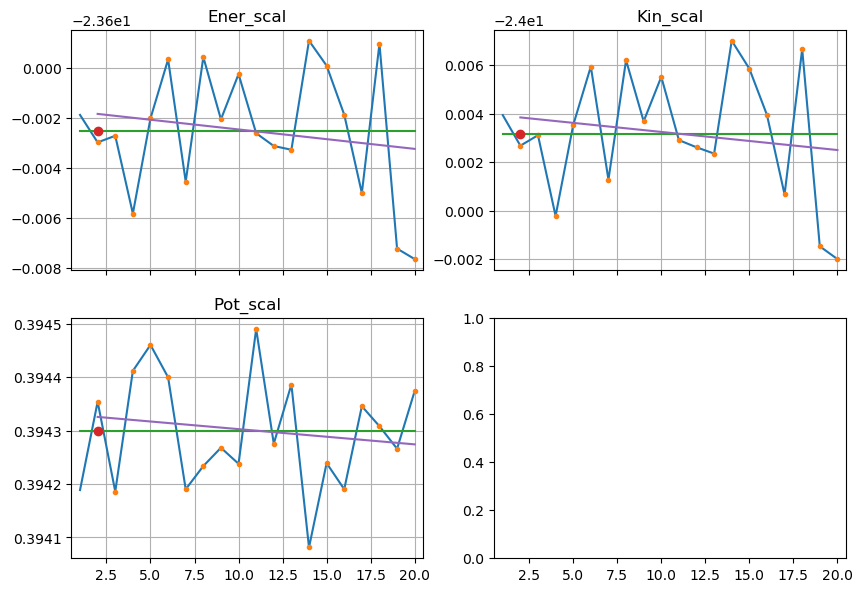

In [11]:
sim.check_warmup(['Ener_scal', 'Kin_scal', 'Pot_scal'])

Ener_scal
Kin_scal


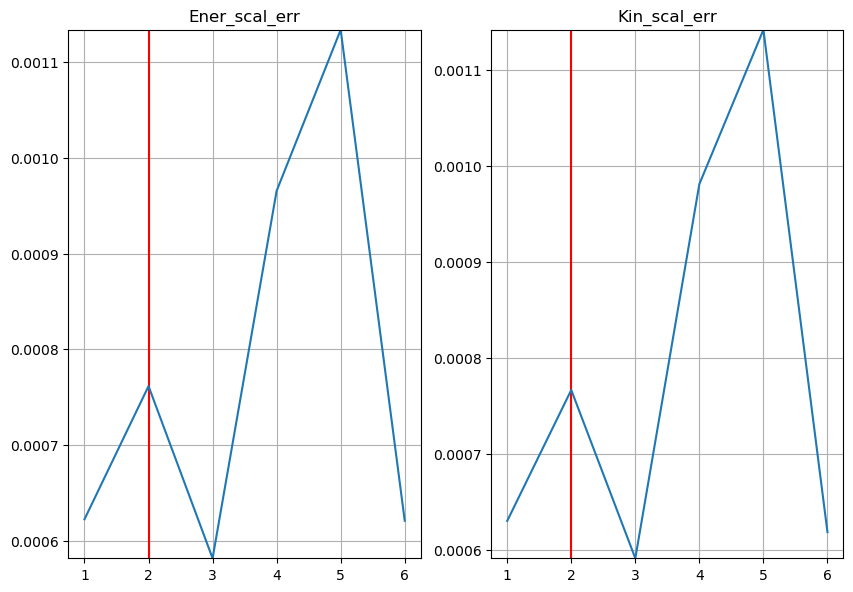

In [20]:
sim.check_rebin(['Ener_scal', 'Kin_scal'])

**5.** Perform some simple analyses:

In [13]:
sim.analysis()

### Analyzing /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square ###
/home/jonas/Programs/pyALF/Notebooks
Custom observables:
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
Den_tau
Green_tau
SpinT_tau
SpinXY_tau
SpinZ_tau


**6.** Store computed observables list:

In [14]:
obs = sim.get_obs()
# Pandas Dataframe with one row per simulation, containing parameters and observables

/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square


In [15]:
obs

,continuous,ham_chem,ham_t,ham_t2,ham_tperp,ham_u,ham_u2,mz,l1,l2,...,SpinXY_tauK,SpinXY_tauK_err,SpinXY_tauR,SpinXY_tauR_err,SpinXY_tau_lattice,SpinZ_tauK,SpinZ_tauK_err,SpinZ_tauR,SpinZ_tauR_err,SpinZ_tau_lattice
/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square,0,0.0,1.0,1.0,1.0,0.1,0.1,1,4,4,...,"[[0.5080076261982133, 0.3785522994234195, 0.50...","[[9.414237702417696e-05, 0.0001576756632826903...","[[0.0007013250114372373, -0.07129968212591752,...","[[1.3637741728564651e-05, 2.7944566652669285e-...","{'L1': [4.0, 0.0], 'L2': [0.0, 4.0], 'a1': [1....","[[0.5079859138864368, 0.37841259792554793, 0.5...","[[0.0003458390492177634, 0.0002045177285061865...","[[0.0006639469430255151, -0.07131738425738869,...","[[0.00013688372070521813, 0.000150300113376766...","{'L1': [4.0, 0.0], 'L2': [0.0, 4.0], 'a1': [1...."


In [16]:
obs.iloc[0]

continuous                                                           0
ham_chem                                                           0.0
ham_t                                                              1.0
ham_t2                                                             1.0
ham_tperp                                                          1.0
                                           ...                        
SpinZ_tauK           [[0.5079859138864368, 0.37841259792554793, 0.5...
SpinZ_tauK_err       [[0.0003458390492177634, 0.0002045177285061865...
SpinZ_tauR           [[0.0006639469430255151, -0.07131738425738869,...
SpinZ_tauR_err       [[0.00013688372070521813, 0.000150300113376766...
SpinZ_tau_lattice    {'L1': [4.0, 0.0], 'L2': [0.0, 4.0], 'a1': [1....
Name: /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square, Length: 110, dtype: object

which are available for further analyses. For instance, the internal energy of the system (and its error) is accessed by:

In [17]:
obs.iloc[0][['Ener_scal0', 'Ener_scal0_err', 'Ener_scal_sign', 'Ener_scal_sign_err']]

Ener_scal0           -23.602505
Ener_scal0_err         0.000761
Ener_scal_sign              1.0
Ener_scal_sign_err          0.0
Name: /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square, dtype: object

**New:** 2dplot on bravais lattice

In [18]:
from alf_ana.lattice import Lattice
import matplotlib.pyplot as plt
import matplotlib as mpl

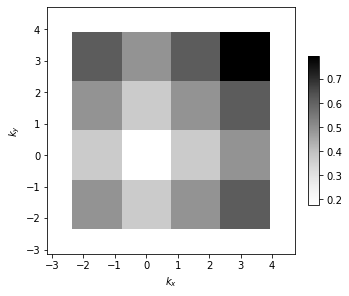

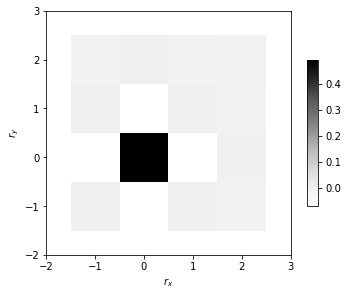

In [19]:
latt = Lattice(obs.iloc[0].Den_eq_lattice)
dat = obs.iloc[0].Den_eqK[0, 0]
latt.plot_k(dat)

dat = obs.iloc[0].Den_eqR[0, 0]
latt.plot_r(dat)